# Cálculo de abundancias en el cúmulo abierto M67 usando los resultados de GALAH

Lectura de tabla obtenida con TOPCAT

In [57]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.cm as cm
import sigmaclip as sc

hdu = fits.open('Tablas_backup/m67_edr3_member_galah.fits')
datos = hdu[1].data


Elementos para los que tenemos medidas


In [90]:
elementos=['C','O','Na','Mg','Al','Si','K','Ca','Sc','Ti','V','Cr','Mn','Co','Ni','Cu','Zn','Rb','Y','Mo','Ru','Ba',
'La','Nd','Sm','Eu']

##  Calculo de la abundancia de Fe

Ya hemos aplicado la condición de flag_fe_h =0
Histograma de la abundancia de Fe

Text(0.5, 0, '[Fe/H]')

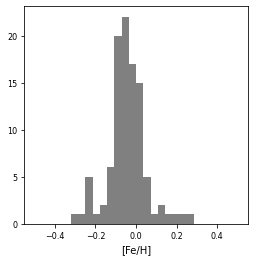

In [59]:
fig = plt.figure(0,figsize=(4,4))


plt.hist(datos['fe_h'], bins='auto', range=(-0.5,0.5),color='grey')
plt.xlim=(-0.5, 0.5)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('[Fe/H]')


Aplicamos un kappa-sigma clipping para eliminar los valores que más se desvían y calculamos al media.

In [60]:

fesel,nit = sc.sigmaclip(datos['fe_h'], errors=datos['e_fe_h'], niter=5, siglow=3., sighigh=3., use_median=False)
use=[x for x in range(len(fesel)) if fesel[x]==True]

mean,sig,sint=sc.calcsigma(datos['fe_h'][use], errors=datos['e_fe_h'][use])
median=np.median(datos['fe_h'][use])
print('Fe:','media=',"%.3f" % mean,' sigma=',"%.3f" % sig,' mediana=',"%.3f" % median,' N=',len(use))

Fe: media= -0.058  sigma= 0.089  mediana= -0.043  N= 100


Volvemos a pintar el histograma superponiendo los valores obtenidos

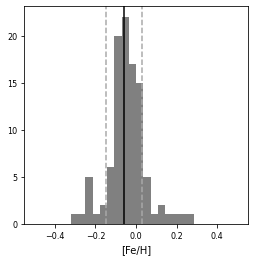

In [61]:
fig = plt.figure(0,figsize=(4,4))


plt.hist(datos['fe_h'], bins='auto', range=(-0.5,0.5),color='grey')
plt.xlim=(-0.5, 0.5)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('[Fe/H]')

plt.axvline(x=mean,c='black')
plt.axvline(x=mean-sig,c='darkgrey',linestyle='--')
plt.axvline(x=mean+sig,c='darkgrey',linestyle='--')

##  Calculo de la abundancia del resto de elementos

Vamos a pintar la gráfica de todos los elementos frente a [Fe/H] y calcular el valor promedio del cúmulo.

Preliminares para la gráfica

In [63]:
kb=[0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6,0,1,2,3,4,5,6]
ka=[0,0,0,0,0,0,0,1,1,1,1,1,1,1,2,2,2,2,2,2,2,3,3,3,3,3,3,3]


Bucle en cada elemento
a) Selecionamos las estrellas con flag_X_fe=0 con X el elemento que estamos estudiando
b) Pintamos la gráfica
c) Calculamos el valor promedio usando kappa-sigma clipping

C: media= 0.005  sigma= 0.182  mediana= 0.065  N= 65
O: media= 0.114  sigma= 0.150  mediana= 0.079  N= 101
Na: media= 0.064  sigma= 0.085  mediana= 0.059  N= 101
Mg: media= 0.013  sigma= 0.090  mediana= -0.002  N= 100
Al: media= 0.078  sigma= 0.120  mediana= 0.027  N= 101
Si: media= 0.060  sigma= 0.121  mediana= 0.011  N= 102
K: media= -0.021  sigma= 0.126  mediana= -0.039  N= 102
Ca: media= 0.036  sigma= 0.063  mediana= 0.048  N= 95
Sc: media= 0.032  sigma= 0.059  mediana= 0.033  N= 99
Ti: media= 0.018  sigma= 0.067  mediana= 0.012  N= 99
V: media= 0.178  sigma= 0.167  mediana= 0.141  N= 53
Cr: media= -0.011  sigma= 0.073  mediana= -0.030  N= 98
Mn: media= 0.020  sigma= 0.071  mediana= 0.005  N= 98
Co: media= 0.027  sigma= 0.081  mediana= 0.161  N= 46
Ni: media= 0.042  sigma= 0.084  mediana= 0.018  N= 95
Cu: media= 0.055  sigma= 0.085  mediana= 0.037  N= 99
Zn: media= 0.025  sigma= 0.130  mediana= 0.023  N= 97
Rb: media= 0.162  sigma= 0.457  mediana= 0.027  N= 6
Y: media= 0.022  sigma

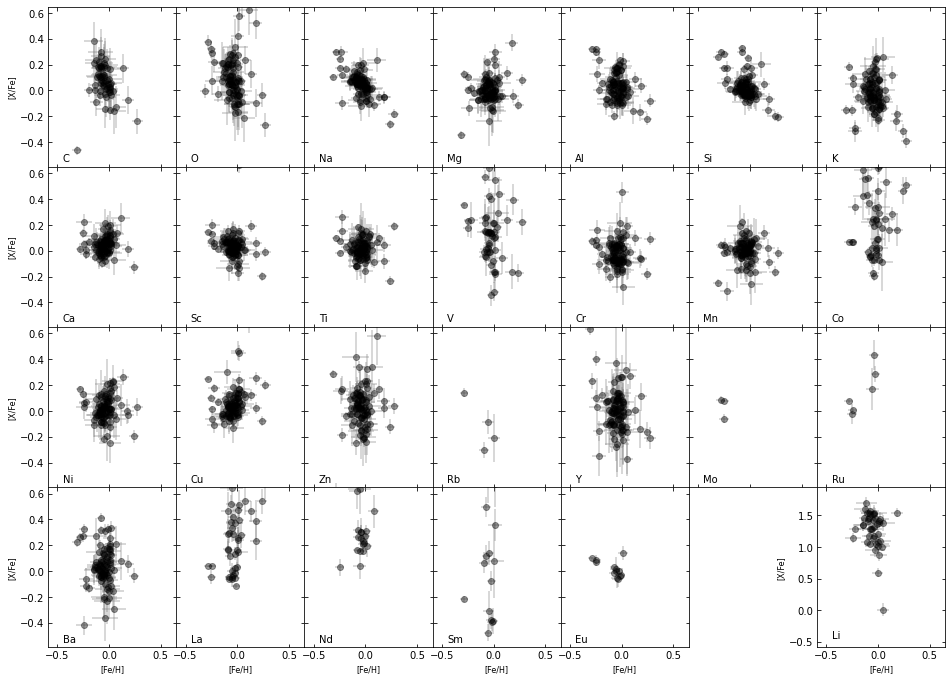

In [114]:
medias=np.full(len(elementos)+1,np.nan)  #Guardaremos los valores de las medias para usarlos mas adelante
fig = plt.figure(1,figsize=(14,10))

gs = gridspec.GridSpec(nrows=4, ncols=7,top=0.99,bottom=0.1,left=0.1,right=0.99,wspace=0,hspace=0, width_ratios=[1,1,1,1,1,1,1])

for i in range(len(elementos)):
    elem=elementos[i].lower()
    axs = fig.add_subplot(gs[ka[i],kb[i]])
    axs.tick_params(direction='in', top=True, right=True)
    sel =[x for x in range(len(datos['fe_h'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
    axs.errorbar(datos['fe_h'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
    axs.set_xlim(-0.59,0.65)
    axs.set_ylim(-0.59,0.65)
    if ka[i] == 3:
        axs.set_xlabel('[Fe/H]',size=8)
    else:
        axs.axes.get_xaxis().set_ticklabels([])
    if kb[i] == 0:
        axs.set_ylabel('[X/Fe]',size=8)
    else:
        axs.axes.get_yaxis().set_ticklabels([])
    axs.text(-0.45,-0.55,elementos[i])
    #Calculamos el valore promedio
    elemsel,nit = sc.sigmaclip(datos[elem+'_fe'][sel], errors=datos['e_'+elem+'_fe'][sel], niter=1, siglow=3., sighigh=3., use_median=False)
    selelem=[x for x in range(len(elemsel)) if elemsel[x]==True]
    use=[sel[x] for x in selelem]
    mean,sig,sint=sc.calcsigma(datos[elem+'_fe'][use], errors=datos['e_'+elem+'_fe'][use])
    median=np.median(datos[elem+'_fe'][use])
    print(elementos[i]+':','media=',"%.3f" % mean,' sigma=',"%.3f" % sig,' mediana=',"%.3f" % median,' N=',len(use))
    medias[i]=mean
#Litio
elem='li'
axs = fig.add_subplot(gs[3,6])
axs.tick_params(direction='in', top=True, right=True)
sel =[x for x in range(len(datos['fe_h'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
axs.errorbar(datos['fe_h'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
axs.set_xlim(-0.59,0.65)
axs.set_ylim(-0.59,1.95)
axs.set_xlabel('[Fe/H]',size=8)
axs.set_ylabel('[X/Fe]',size=8)
axs.text(-0.45,-0.45,'Li')
#Calculamos el valore promedio
elemsel,nit = sc.sigmaclip(datos[elem+'_fe'][sel], errors=datos['e_'+elem+'_fe'][sel], niter=1, siglow=3., sighigh=3., use_median=False)
selelem=[x for x in range(len(elemsel)) if elemsel[x]==True]
use=[sel[x] for x in selelem]
mean,sig,sint=sc.calcsigma(datos[elem+'_fe'][use], errors=datos['e_'+elem+'_fe'][use])
median=np.median(datos[elem+'_fe'][use])
print('Li:','media=',"%.3f" % mean,' sigma=',"%.3f" % sig,' mediana=',"%.3f" % median,' N=',len(use))
medias[len(medias)-1]=mean
plt.savefig('fig_ratios.png',dpi=300)
plt.show()



##  Dependencia con el estadio evolutivo
Pintamos la variación de las abundancias con log g

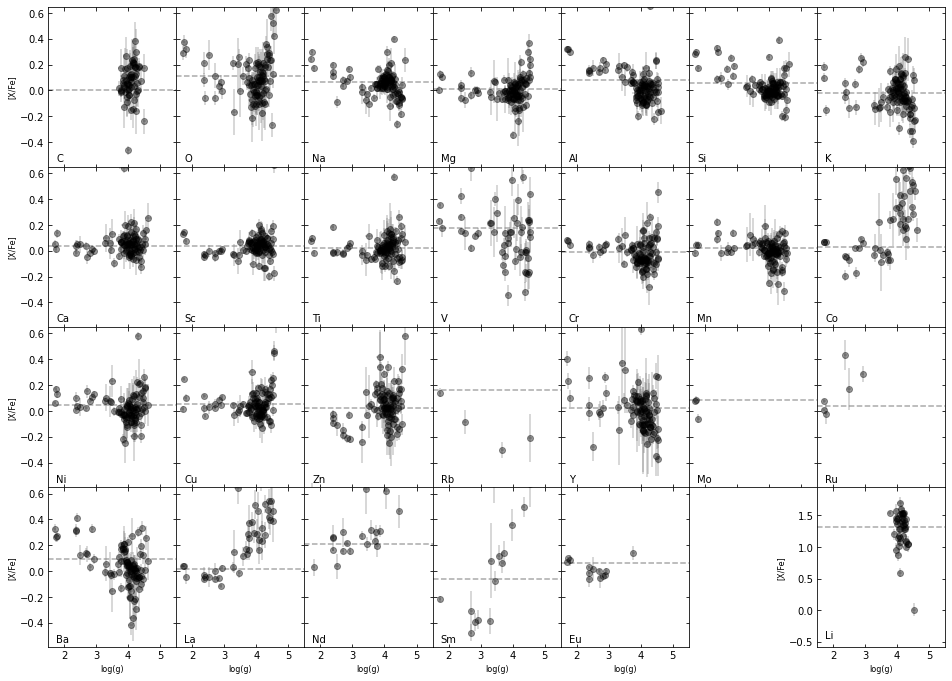

In [120]:
fig = plt.figure(2,figsize=(14,10))

gs = gridspec.GridSpec(nrows=4, ncols=7,top=0.99,bottom=0.1,left=0.1,right=0.99,wspace=0,hspace=0, width_ratios=[1,1,1,1,1,1,1])

for i in range(len(elementos)):
    elem=elementos[i].lower()
    axs = fig.add_subplot(gs[ka[i],kb[i]])
    axs.tick_params(direction='in', top=True, right=True)
    sel =[x for x in range(len(datos['fe_h'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
    axs.errorbar(datos['logg'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
    axs.set_xlim(1.5,5.5)
    axs.set_ylim(-0.59,0.65)
    if ka[i] == 3:
        axs.set_xlabel('log(g)',size=8)
    else:
        axs.axes.get_xaxis().set_ticklabels([])
    if kb[i] == 0:
        axs.set_ylabel('[X/Fe]',size=8)
    else:
        axs.axes.get_yaxis().set_ticklabels([])
    axs.text(1.75,-0.55,elementos[i])
    axs.axhline(y=medias[i],c='darkgrey',linestyle='--',zorder=0)

#Litio
elem='li'
axs = fig.add_subplot(gs[3,6])
axs.tick_params(direction='in', top=True, right=True)
sel =[x for x in range(len(datos[elem+'_fe'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
axs.errorbar(datos['logg'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
axs.set_xlim(1.5,5.5)
axs.set_ylim(-0.59,1.95)
axs.set_xlabel('log(g)',size=8)
axs.set_ylabel('[X/Fe]',size=8)
axs.text(1.75,-0.45,'Li')
axs.axhline(y=medias[len(medias)-1],c='darkgrey',linestyle='--',zorder=0)

plt.savefig('fig_logg.png',dpi=300)
plt.show()

Pintamos la variación de las abundancias con Teff

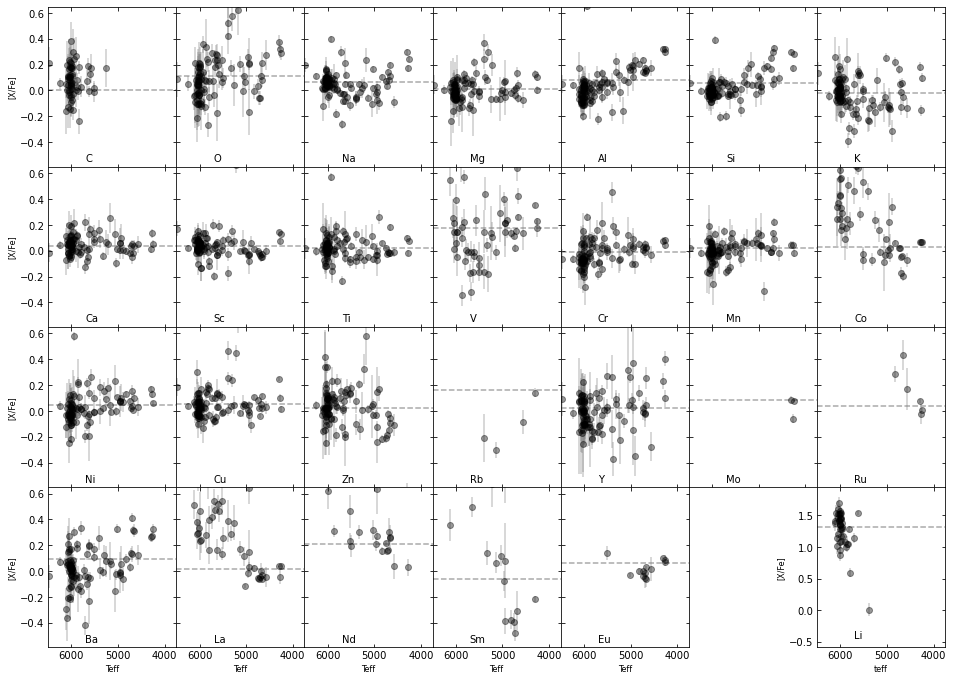

In [121]:
fig = plt.figure(2,figsize=(14,10))

gs = gridspec.GridSpec(nrows=4, ncols=7,top=0.99,bottom=0.1,left=0.1,right=0.99,wspace=0,hspace=0, width_ratios=[1,1,1,1,1,1,1])

for i in range(len(elementos)):
    elem=elementos[i].lower()
    axs = fig.add_subplot(gs[ka[i],kb[i]])
    axs.tick_params(direction='in', top=True, right=True)
    sel =[x for x in range(len(datos['fe_h'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
    axs.errorbar(datos['teff'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
    axs.set_xlim(6500,3750)
    axs.set_ylim(-0.59,0.65)
    if ka[i] == 3:
        axs.set_xlabel('Teff',size=8)
    else:
        axs.axes.get_xaxis().set_ticklabels([])
    if kb[i] == 0:
        axs.set_ylabel('[X/Fe]',size=8)
    else:
        axs.axes.get_yaxis().set_ticklabels([])
    axs.text(5700,-0.55,elementos[i])
    axs.axhline(y=medias[i],c='darkgrey',linestyle='--',zorder=0)

#Litio
elem='li'
axs = fig.add_subplot(gs[3,6])
axs.tick_params(direction='in', top=True, right=True)
sel =[x for x in range(len(datos[elem+'_fe'])) if datos['flag_'+elem+'_fe'][x]==0] #Seleccionamos las estrellas
axs.errorbar(datos['teff'][sel],datos[elem+'_fe'][sel],xerr=datos['e_fe_h'][sel],yerr=datos['e_'+elem+'_fe'][sel],fmt='o',c='black',ecolor='grey',alpha=0.4)
axs.set_xlim(6500,3750)
axs.set_ylim(-0.59,1.95)
axs.set_xlabel('teff',size=8)
axs.set_ylabel('[X/Fe]',size=8)
axs.text(5700,-0.45,'Li')
axs.axhline(y=medias[len(medias)-1],c='darkgrey',linestyle='--',zorder=0)

plt.savefig('fig_teff.png',dpi=300)
plt.show()